# Data analysis : Theme

Recencement des medecins generalistes

## Step 0 : Preparations

### Step 0.1 : Import libraries

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.
import seaborn as sns

### Step 0.2 : Load files, or call API

In [149]:
# 197 mo file
# link to download : https://public.opendatasoft.com/explore/dataset/sirene_v3/download/?format=csv&disjunctive.libellecommuneetablissement=true&disjunctive.etatadministratifetablissement=true&disjunctive.sectionetablissement=true&disjunctive.naturejuridiqueunitelegale=true&refine.departementetablissement=LANDES&timezone=Europe/Paris&lang=fr&use_labels_for_header=true&csv_separator=%3B

df=pd.read_csv("medecins.csv", error_bad_lines=False, sep=";")

c:\Users\Sidali\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Step 1 : Exploratory Data Analysis

### Step 1.1 : Check data shape

In [150]:
df.shape

(16497, 48)

In [151]:
df

Civilité                Column 9 Numéro de téléphone  Code Profession  \
0        Femme                  ASFELD      03.24.72.93.77             45.0   
1        Femme   NOTRE DAME DES LANDES      02.40.57.24.77             45.0   
2        Femme          BASSE GOULAINE                 NaN             45.0   
3        Femme                 CASTETS      05.58.89.41.52             18.0   
4        Homme             BISCARROSSE                 NaN             18.0   
...        ...                     ...                 ...              ...   
16492    Femme        PARENTIS EN BORN      05.58.04.69.85             71.0   
16493    Femme   ST VINCENT DE TYROSSE      05.58.77.01.32             18.0   
16494    Femme   ST VINCENT DE TYROSSE      05.58.77.01.32             18.0   
16495    Homme          MONT DE MARSAN      05.58.75.02.14             18.0   
16496    Femme  ST LAMBERT LA POTHERIE      02.41.77.00.91             45.0   

      Mode d'exercice particulier Nature d'exercice  \
0                             NaN  Libéral intégral   
1                             NaN  Libéral intégral   
2                             NaN  Libéral intégral   
3                             NaN  Libéral intégral   
4                             NaN  Libéral intégral   
...                           ...               ...   
16492                         NaN  Libéral intégral   
16493                         NaN  Libéral intégral   
16494                         NaN  Libéral intégral   
16495                         NaN  Libéral intégral   
16496                         NaN  Libéral intégral   

               Convention et CAS Contrat d'accès aux soins  \
0      Secteur 1 ou conventionné                         N   
1      Secteur 1 ou conventionné                         N   
2      Secteur 1 ou conventionné                         N   
3      Secteur 1 ou conventionné                       NaN   
4      Secteur 1 ou conventionné                       NaN   
...                          ...                       ...   
16492  Secteur 1 ou conventionné                       NaN   
16493  Secteur 1 ou conventionné                       NaN   
16494  Secteur 1 ou conventionné                       NaN   
16495  Secteur 1 ou conventionné                       NaN   
16496  Secteur 1 ou conventionné                         N   

                        Sesam Vitale Code CCAM de l'acte réalisé  ...  \
0      Lecteur de carte Sesam Vitale                    QZGA0020  ...   
1      Lecteur de carte Sesam Vitale                          GS  ...   
2      Lecteur de carte Sesam Vitale                           G  ...   
3      Lecteur de carte Sesam Vitale                    HBLD4520  ...   
4      Lecteur de carte Sesam Vitale                    HBFD0330  ...   
...                              ...                         ...  ...   
16492  Lecteur de carte Sesam Vitale                           C  ...   
16493  Lecteur de carte Sesam Vitale                    HBFD0330  ...   
16494  Lecteur de carte Sesam Vitale                    HBQK0020  ...   
16495  Lecteur de carte Sesam Vitale                    HBLD2450  ...   
16496  Lecteur de carte Sesam Vitale                    DEQP0030  ...   

       Code INSEE Région  Code INSEE Département  activite_principale  \
0                     44                       8                    1   
1                     52                      44                    1   
2                     52                      44                    1   
3                     75                      40                    1   
4                     75                      40                    1   
...                  ...                     ...                  ...   
16492                 75                      40                    1   
16493                 75                      40                    1   
16494                 75                      40                    1   
16495                 75                    

### Step 1.2 : Check each data type of columns and missing values

In [152]:
df.columns

Index(['Civilité', 'Column 9', 'Numéro de téléphone', 'Code Profession',
       'Mode d'exercice particulier', 'Nature d'exercice', 'Convention et CAS',
       'Contrat d'accès aux soins', 'Sesam Vitale',
       'Code CCAM de l'acte réalisé', 'Famille de l'acte réalisé',
       'Montant généralement constaté', 'Borne inférieure montant',
       'Borne supérieure montant', 'Montant : 2nd intervenant',
       'Borne Inf : 2nd intervenant', 'Borne Sup : 2nd intervenant',
       'Montant : Imagerie', 'Borne Inf : Imagerie', 'Borne Sup : Imagerie',
       'Montant : Anesthésie', 'Borne Inf : Anesthésie',
       'Borne Sup : Anesthésie', 'Montant : Circulation extra corporelle',
       'Borne Inf : Circulation extra-corporelle',
       'Borne Sup : Circulation extra-corporelle', 'Nom du professionnel',
       'Adresse', 'Profession', 'Type d'acte réalisé',
       'Famille de l'acte technique réalisé', 'Coordonnées', 'Commune',
       'code_insee', 'EPCI', 'Département', 'Région', 'Code EPCI'

In [153]:
df[["Column 9","Commune"]]

Column 9                    Commune
0                      ASFELD                     Asfeld
1       NOTRE DAME DES LANDES      Notre-Dame-des-Landes
2              BASSE GOULAINE             Basse-Goulaine
3                     CASTETS                    Castets
4                 BISCARROSSE                Biscarrosse
...                       ...                        ...
16492        PARENTIS EN BORN           Parentis-en-Born
16493   ST VINCENT DE TYROSSE   Saint-Vincent-de-Tyrosse
16494   ST VINCENT DE TYROSSE   Saint-Vincent-de-Tyrosse
16495          MONT DE MARSAN             Mont-de-Marsan
16496  ST LAMBERT LA POTHERIE  Saint-Lambert-la-Potherie

[16497 rows x 2 columns]

In [154]:
df = df.drop(["Column 9"], axis=1) #Supprimer la colonne Column 9 qui est redondante

In [155]:
df = df[df["Département"]=="LANDES"] # On garde que les données du département des landes
df

Civilité Numéro de téléphone  Code Profession  \
3        Femme      05.58.89.41.52             18.0   
4        Homme                 NaN             18.0   
5        Homme                 NaN             18.0   
6        Homme                 NaN             18.0   
7        Homme                 NaN             67.0   
...        ...                 ...              ...   
16491    Homme      05.59.56.64.42             67.0   
16492    Femme      05.58.04.69.85             71.0   
16493    Femme      05.58.77.01.32             18.0   
16494    Femme      05.58.77.01.32             18.0   
16495    Homme      05.58.75.02.14             18.0   

      Mode d'exercice particulier Nature d'exercice  \
3                             NaN  Libéral intégral   
4                             NaN  Libéral intégral   
5                             NaN  Libéral intégral   
6                             NaN  Libéral intégral   
7                             NaN  Libéral intégral   
...                           ...               ...   
16491                         NaN  Libéral intégral   
16492                         NaN  Libéral intégral   
16493                         NaN  Libéral intégral   
16494                         NaN  Libéral intégral   
16495                         NaN  Libéral intégral   

               Convention et CAS Contrat d'accès aux soins  \
3      Secteur 1 ou conventionné                       NaN   
4      Secteur 1 ou conventionné                       NaN   
5      Secteur 1 ou conventionné                       NaN   
6      Secteur 1 ou conventionné                       NaN   
7      Secteur 1 ou conventionné                         N   
...                          ...                       ...   
16491  Secteur 1 ou conventionné                         N   
16492  Secteur 1 ou conventionné                       NaN   
16493  Secteur 1 ou conventionné                       NaN   
16494  Secteur 1 ou conventionné                       NaN   
16495  Secteur 1 ou conventionné                       NaN   

                        Sesam Vitale Code CCAM de l'acte réalisé  \
3      Lecteur de carte Sesam Vitale                    HBLD4520   
4      Lecteur de carte Sesam Vitale                    HBFD0330   
5      Lecteur de carte Sesam Vitale                    HBGD0360   
6      Lecteur de carte Sesam Vitale                    HBMD0200   
7      Lecteur de carte Sesam Vitale                    LDQK0020   
...                              ...                         ...   
16491  Lecteur de carte Sesam Vitale                    MAQK0010   
16492  Lecteur de carte Sesam Vitale                           C   
16493  Lecteur de carte Sesam Vitale                    HBFD0330   
16494  Lecteur de carte Sesam Vitale                    HBQK0020   
16495  Lecteur de carte Sesam Vitale                    HBLD2450   

       Famille de l'acte réalisé  ...  Code INSEE Région  \
3                          157.0  ...                 75   
4                           87.0  ...                 75   
5                          128.0  ...                 75   
6                          183.0  ...                 75   
7                          174.0  ...                 75   
...                          ...  ...                ...   
16491                      177.0  ...                 75   
16492                        NaN  ...                 75   
16493                       87.0  ...                 75   
16494                      167.0  ...                 75   
16495                        7.0  ...                 75   

       Code INSEE Département  activite_principale        Regroupement  \
3                          40                    1                None   
4                          40                    1  Actes d'endodontie   
5                          40                    1  Actes de chirurgie   
6                          40                    1                None   
7                          40  

In [156]:
df[['Adresse', 'Coordonnées', 'code_insee', 'Département', 'Région', 'Code INSEE Région', 'Code INSEE Département', 'concat']]

Adresse          Coordonnées  \
3                   143 RUE SAINTE HELENE  40260 CASTETS   43.88059,-1.148912   
4          84 AVENUE DE LA REPUBLIQUE  40600 BISCARROSSE   44.398614,-1.16554   
5          84 AVENUE DE LA REPUBLIQUE  40600 BISCARROSSE   44.398614,-1.16554   
6          84 AVENUE DE LA REPUBLIQUE  40600 BISCARROSSE   44.398614,-1.16554   
7      MEDIPOLE DE L'AERODROME 25 AVENUE NUNGESSER ET...  43.693681,-1.067611   
...                                                  ...                  ...   
16491  SELAS OCEAN IMAGERIE  20 ALLEE DU PETIT PIERRE...  43.555728,-1.362062   
16492    14 RUE DE L'AEROPOSTALE  40160 PARENTIS EN BORN  44.351425,-1.077153   
16493  36 AVENUE DE LE COTE D'ARGENT  40230 ST VINCEN...   43.661246,-1.30604   
16494  36 AVENUE DE LE COTE D'ARGENT  40230 ST VINCEN...   43.661246,-1.30604   
16495  5 RUE DOMINIQUE DE GOURGUES  40000 MONT DE MARSAN   43.89228,-0.502323   

       code_insee Département              Région  Code INSEE Région  \
3           40075      LANDES  NOUVELLE-AQUITAINE                 75   
4           40046      LANDES  NOUVELLE-AQUITAINE                 75   
5           40046      LANDES  NOUVELLE-AQUITAINE                 75   
6           40046      LANDES  NOUVELLE-AQUITAINE                 75   
7           40088      LANDES  NOUVELLE-AQUITAINE                 75   
...           ...         ...                 ...                ...   
16491       40248      LANDES  NOUVELLE-AQUITAINE                 75   
16492       40217      LANDES  NOUVELLE-AQUITAINE                 75   
16493       40284      LANDES  NOUVELLE-AQUITAINE                 75   
16494       40284      LANDES  NOUVELLE-AQUITAINE                 75   
16495       40192      LANDES  NOUVELLE-AQUITAINE                 75   

       Code INSEE Département  \
3                          40   
4                          40   
5                          40   
6                          40   
7                          40   
...                       ...   
16491                      40   
16492                      40   
16493                      40   
16494                      40   
16495                      40   

                                                  concat  
3      LUCIA MADRAZO DELGADO  143 RUE SAINTE HELENE  ...  
4      DAVID BALLANGER  84 AVENUE DE LA REPUBLIQUE  4...  
5      DAVID BALLANGER  84 AVENUE DE LA REPUBLIQUE  4...  
6      DAVID BALLANGER  84 AVENUE DE LA REPUBLIQUE  4...  
7      OLIVIER RISCH MEDIPOLE DE L'AERODROME 25 AVENU...  
...                                                  ...  
16491  JEAN MICHEL DARRIGADESELAS OCEAN IMAGERIE  20 ...  
16492  FREDERIQUE DUPONT  14 RUE DE L'AEROPOSTALE  40...  
16493  MARIELLE JAURY  36 AVENUE DE LE COTE D'ARGENT ...  
16494  MARIELLE JAURY  36 AVENUE DE LE COTE D'ARGENT ...  
16495  MICHEL LAJUNCOMME  5 RUE DOMINIQUE DE GOURGUES...  

[15505 rows x 8 columns]

In [157]:
df = df.drop(['Département', 'Région', 'Code INSEE Région', 'Code INSEE Département', 'concat'], axis=1) #Supprimer la colonne du département et région car on a que le département des landes

In [158]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15505 entries, 3 to 16495
Data columns (total 42 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Civilité                                             15505 non-null  object 
 1   Numéro de téléphone                                  10127 non-null  object 
 2   Code Profession                                      15428 non-null  float64
 3   Mode d'exercice particulier                          46 non-null     object 
 4   Nature d'exercice                                    15505 non-null  object 
 5   Convention et CAS                                    15505 non-null  object 
 6   Contrat d'accès aux soins                            7825 non-null   object 
 7   Sesam Vitale                                         15505 non-null  object 
 8   Code CCAM de l'acte réalisé                          15505 non-nul

<ipython-input-158-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


### Step 1.3 : Check the percentages of missing value and remove columns with only null values

In [159]:
print(df.isnull().sum() / df.shape[0])
print(df.shape)

# Drop columns with only null
df.dropna(axis=1, how='all', inplace=True)

print(df.isnull().sum() / df.shape[0])
print(df.shape)

Civilité                                               0.000000
Numéro de téléphone                                    0.346856
Code Profession                                        0.004966
Mode d'exercice particulier                            0.997033
Nature d'exercice                                      0.000000
Convention et CAS                                      0.000000
Contrat d'accès aux soins                              0.495324
Sesam Vitale                                           0.000000
Code CCAM de l'acte réalisé                            0.000000
Famille de l'acte réalisé                              0.127249
Montant généralement constaté                          0.660819
Borne inférieure montant                               0.896356
Borne supérieure montant                               0.896356
Montant : 2nd intervenant                              1.000000
Borne Inf : 2nd intervenant                            1.000000
Borne Sup : 2nd intervenant             

In [160]:
import operator

cols = {} #Dictionnaire qui contiendra pour chaque colonne le pourcentage des valeurs manquantes

for i in df.columns: #Remplir le dictionnaire d'abord
    cols[i] = df[i].isna().sum()/df.shape[0]

cols = sorted(cols.items(), key=operator.itemgetter(1)) #Puis le trier suivant le pourcentage de valeurs manquantes

for i in cols : #Et enfin afficher les colonnes, leurs types et le pourcentage de valeurs manquantes
    print('La colonne : ' + str(i[0]) + ', Le type : ' + str(df[i[0]].dtype) + 
          ', Le pourcentage des valeurs manquantes : '+ str(i[1]))

La colonne : Civilité, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : Nature d'exercice, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : Convention et CAS, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : Sesam Vitale, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : Code CCAM de l'acte réalisé, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : Nom du professionnel, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : Adresse, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : Type d'acte réalisé, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : Coordonnées, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : Commune, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : code_insee, Le type : int64, Le pourcentage des valeurs manquantes : 0.0

### Step 1.4 : Summary Statistics

In [161]:
df.describe()

Code Profession  Famille de l'acte réalisé  \
count     15428.000000               13532.000000   
mean         36.212341                 140.053577   
std          22.945188                  54.254739   
min           3.000000                   1.000000   
25%          18.000000                 100.000000   
50%          18.000000                 158.000000   
75%          67.000000                 176.000000   
max          74.000000                 220.000000   

       Montant généralement constaté  Borne inférieure montant  \
count                    5259.000000               1607.000000   
mean                      128.060563                186.896515   
std                       194.862063                213.008846   
min                         8.000000                 18.000000   
25%                        33.400000                 45.000000   
50%                        50.200000                 85.000000   
75%                        98.000000                272.500000   
max                      2340.000000               1630.000000   

       Borne supérieure montant  Montant : Anesthésie  Borne Inf : Anesthésie  \
count               1607.000000              2.000000               45.000000   
mean                 251.235034             51.645000               78.380444   
std                  298.450846              1.081873               48.216991   
min                   23.100000             50.880000               48.000000   
25%                   52.800000             51.262500               50.580000   
50%                  130.000000             51.645000               55.350000   
75%                  399.350000             52.027500               85.580000   
max                 3390.200000             52.410000              269.130000   

       Borne Sup : Anesthésie    code_insee     Code EPCI  \
count               45.000000  15505.000000  1.550500e+04   
mean               143.166667  40175.309384  2.371335e+08   
std                 82.904709     96.897374  1.595722e+07   
min                 71.000000  40001.000000  2.000304e+08   
25%                 98.000000  40088.000000  2.440007e+08   
50%                109.850000  40192.000000  2.440007e+08   
75%                148.620000  40279.000000  2.440009e+08   
max                470.980000  40333.000000  2.440009e+08   

       activite_principale  Tarif Secteur 1 / adhérent OPTAM/OPTAM-CO  \
count              15505.0                               13505.000000   
mean                   1.0                                  76.290927   
std                    0.0                                  81.297719   
min                    1.0                                   7.980000   
25%                    1.0                                  28.920000   
50%                    1.0                                  50.540000   
75%                    1.0                                  90.000000   
max                    1.0                                1047.900000   

       Base de remboursement  
count           13505.000000  
mean               75.548213  
std                78.799921  
min                 7.980000  
25%                28.920000  
50%                50.540000  
75%                90.000000  
max              1047.900000

### Step 1.5 : Check value counts for a specific column

In [162]:
# In this exemple, we notice in the next step that a SIREN can be used for multiple structure, but the siret seems to change, so we can test that theory
df["EPCI"].value_counts()

CA du Grand Dax                                 4123
CC Maremne Adour Côte Sud                       3039
CA Mont-de-Marsan Agglomération                 2370
CC du Seignanx                                  1044
CC des Grands Lacs                               839
CC Pays d'Orthe et Arrigans                      737
CC d'Aire-sur-l'Adour                            680
CC de Mimizan                                    603
CC Chalosse Tursan                               531
CC du Pays Tarusate                              285
CC Côte Landes Nature                            241
CC du Pays Morcenais                             211
CC Terres de Chalosse                            194
CC Coeur Haute Lande                             141
CC des Landes d'Armagnac                         140
CC du Pays Grenadois                             138
CC Coteaux et Vallées des Luys                   130
CC du Pays de Villeneuve en Armagnac Landais      59
Name: EPCI, dtype: int64

Text(0, 0.5, 'Count')

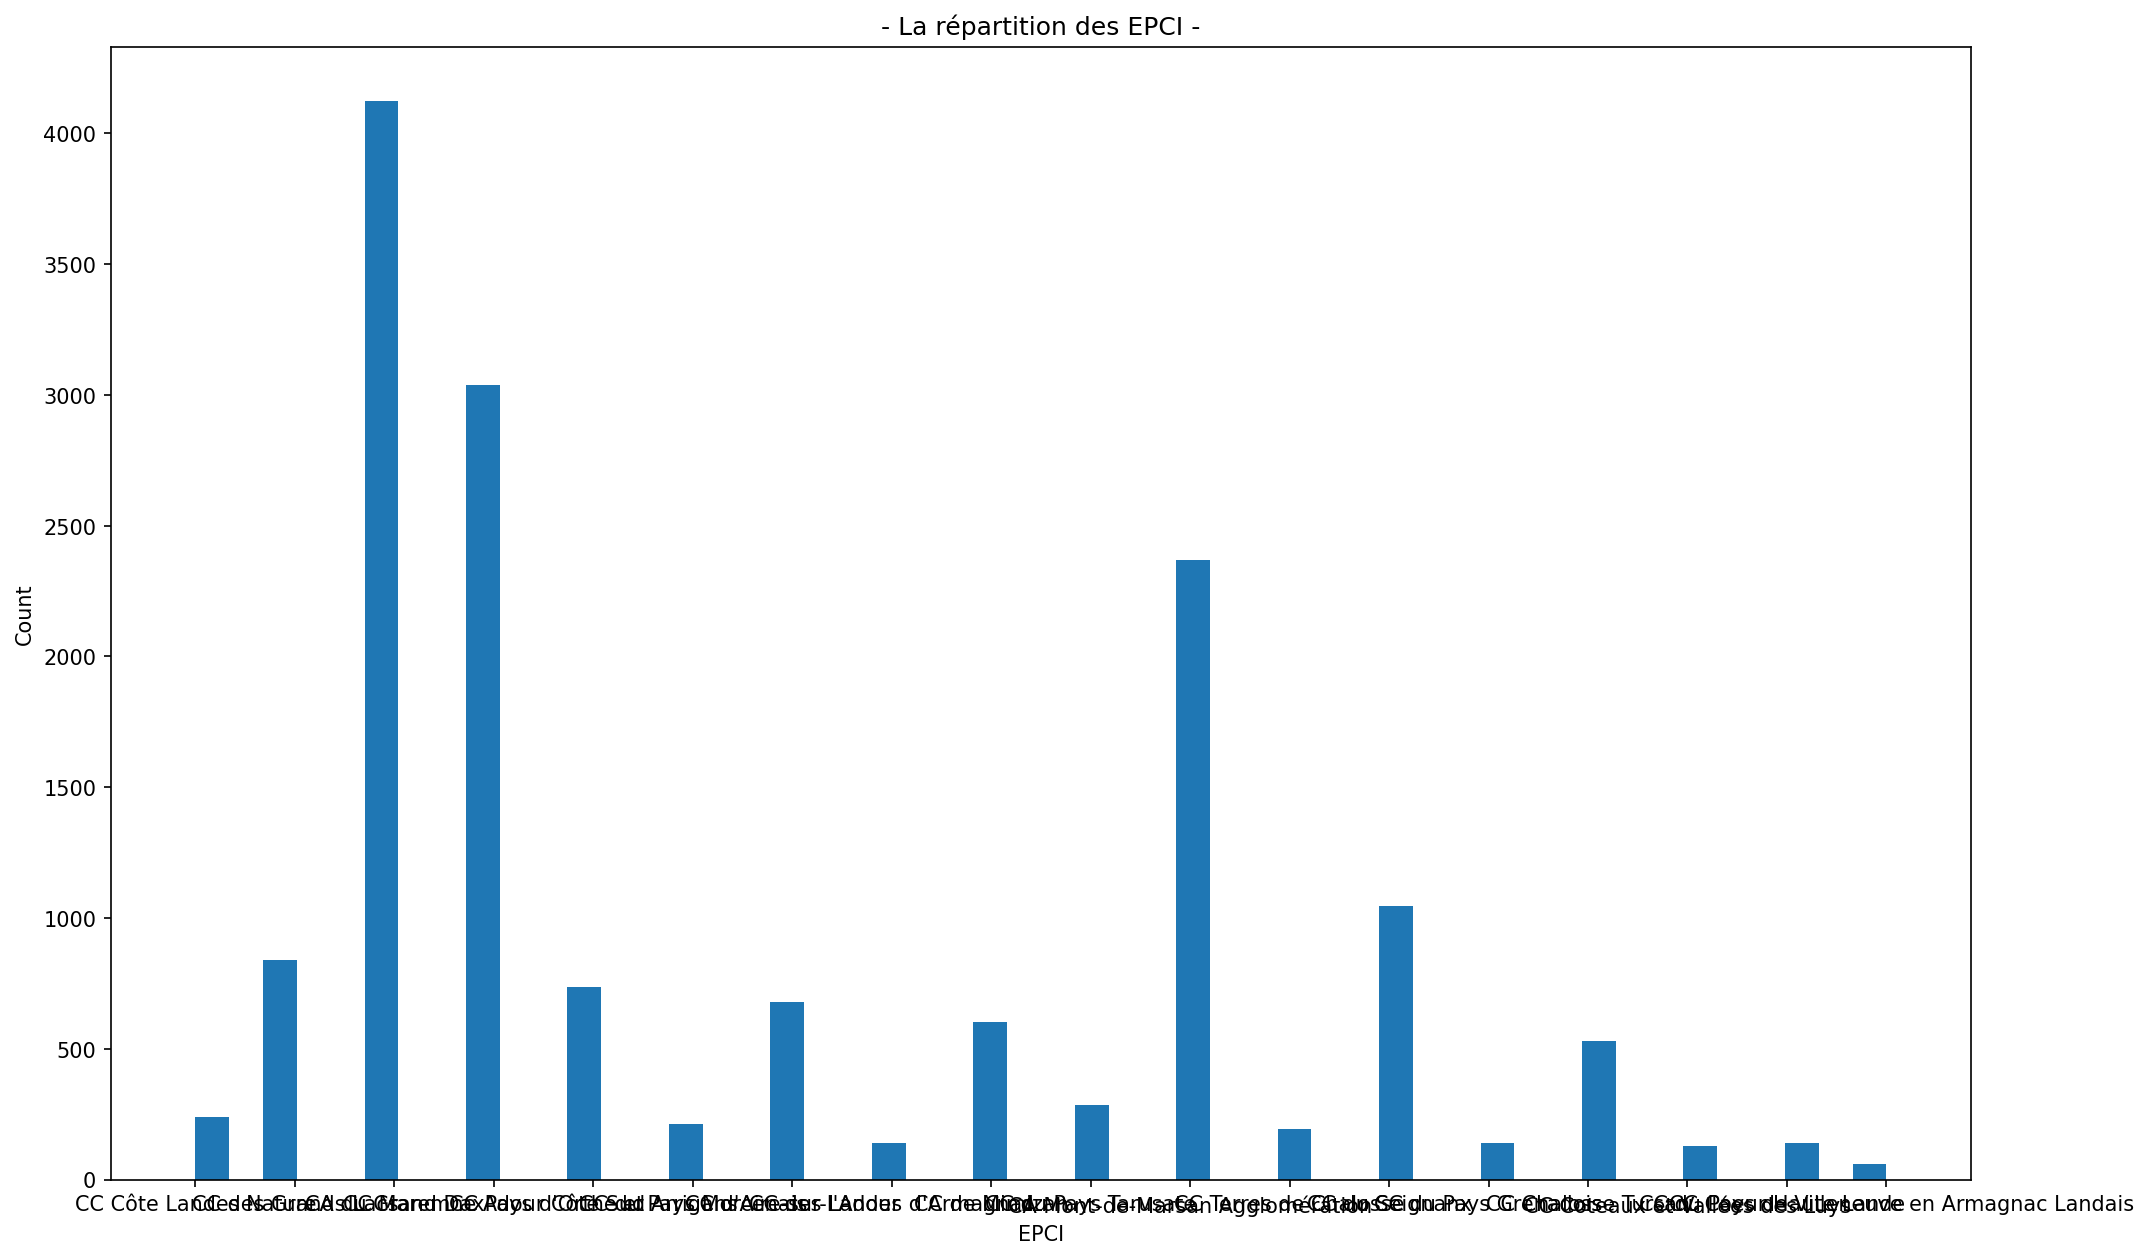

In [163]:
#Visualiser la répartition des EPCI à l'aide d'un histogramme
fig = plt.figure(figsize=(16,10), dpi=150)
plt.hist(df["EPCI"].dropna(), bins=50)  #On supprime les valeurs manquantes de la liste des super_population
plt.title("- La répartition des EPCI -")
plt.xlabel("EPCI")
plt.ylabel("Count")

### Step 1.6 : Check duplicate values

In [164]:
# Example of the data that have multiple values, for text you can use a graph to see count by word and see if some values correspond to the same thing
df[df["Numéro de téléphone"]== "05.58.89.41.52"]

Civilité Numéro de téléphone  Code Profession  \
3        Femme      05.58.89.41.52             18.0   
154      Femme      05.58.89.41.52             18.0   
919      Femme      05.58.89.41.52             18.0   
2643     Femme      05.58.89.41.52             18.0   
3711     Femme      05.58.89.41.52             18.0   
4416     Femme      05.58.89.41.52             18.0   
4618     Femme      05.58.89.41.52             18.0   
5049     Femme      05.58.89.41.52             18.0   
5050     Femme      05.58.89.41.52             18.0   
6944     Femme      05.58.89.41.52             18.0   
6945     Femme      05.58.89.41.52             18.0   
7148     Femme      05.58.89.41.52             18.0   
7954     Femme      05.58.89.41.52             18.0   
8991     Femme      05.58.89.41.52             18.0   
9080     Femme      05.58.89.41.52             18.0   
9511     Femme      05.58.89.41.52             18.0   
9570     Femme      05.58.89.41.52             18.0   
10388    Femme      05.58.89.41.52             18.0   
11341    Femme      05.58.89.41.52             18.0   
11342    Femme      05.58.89.41.52             18.0   
11618    Femme      05.58.89.41.52             18.0   
12031    Femme      05.58.89.41.52             18.0   
12032    Femme      05.58.89.41.52             18.0   
12358    Femme      05.58.89.41.52             18.0   
12945    Femme      05.58.89.41.52             18.0   
13316    Femme      05.58.89.41.52             18.0   
13317    Femme      05.58.89.41.52             18.0   
13318    Femme      05.58.89.41.52             18.0   
13920    Femme      05.58.89.41.52             18.0   
13921    Femme      05.58.89.41.52             18.0   
14253    Femme      05.58.89.41.52             18.0   
14966    Femme      05.58.89.41.52             18.0   
15204    Femme      05.58.89.41.52             18.0   
15754    Femme      05.58.89.41.52             18.0   

      Mode d'exercice particulier Nature d'exercice  \
3                             NaN  Libéral intégral   
154                           NaN  Libéral intégral   
919                           NaN  Libéral intégral   
2643                          NaN  Libéral intégral   
3711                          NaN  Libéral intégral   
4416                          NaN  Libéral intégral   
4618                          NaN  Libéral intégral   
5049                          NaN  Libéral intégral   
5050                          NaN  Libéral intégral   
6944                          NaN  Libéral intégral   
6945                          NaN  Libéral intégral   
7148                          NaN  Libéral intégral   
7954                          NaN  Libéral intégral   
8991                          NaN  Libéral intégral   
9080                          NaN  Libéral intégral   
9511                          NaN  Libéral intégral   
9570                          NaN  Libéral intégral   
10388                         NaN  Libéral intégral   
11341                         NaN  Libéral intégral   
11342                         NaN  Libéral intégral   
11618                         NaN  Libéral intégral   
12031                         NaN  Libéral intégral   
12032                         NaN  Libéral intégral   
12358                         NaN  Libéral intégral   
12945                         NaN  Libéral intégral   
13316                         NaN  Libéral intégral   
13317                         NaN  Libéral intégral   
13318                         NaN  Libéral intégral   
13920                         NaN  Libéral intégral   
13921                         NaN  Libéral intégral   
14253                         NaN  Libéral intégral   
14966                         NaN  Libéral intégral   
15204                         NaN  Libéral intégral   
15754                         NaN  Libéral intégral   

               Convention et CAS Contrat d'accès aux soins  \
3      Secteur 1 ou conventionné                       NaN   
154    Secteur 1 ou convention

### Step 1.7 : See the data distribution and data anomaly

In [165]:
# Look at numerical columns to choose which column to look at more closely
numerical_columns = list(df.select_dtypes('number'))

print(numerical_columns)

['Code Profession', "Famille de l'acte réalisé", 'Montant généralement constaté', 'Borne inférieure montant', 'Borne supérieure montant', 'Montant : Anesthésie', 'Borne Inf : Anesthésie', 'Borne Sup : Anesthésie', 'code_insee', 'Code EPCI', 'activite_principale', 'Tarif Secteur 1 / adhérent OPTAM/OPTAM-CO', 'Base de remboursement']


Code Profession


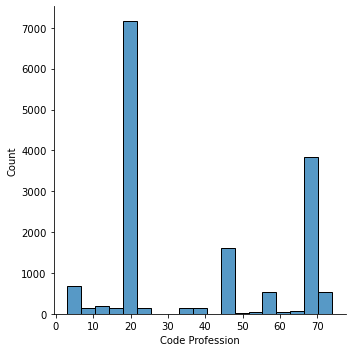

Famille de l'acte réalisé


Montant généralement constaté


Borne inférieure montant


Borne supérieure montant


Montant : Anesthésie


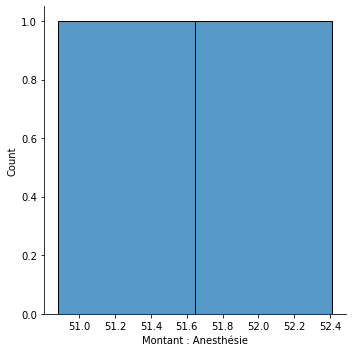

Borne Inf : Anesthésie


Borne Sup : Anesthésie


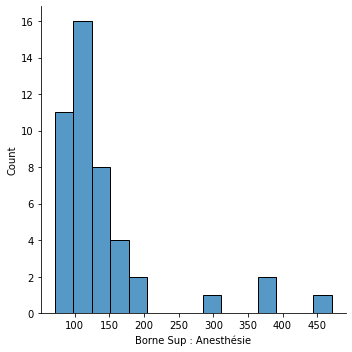

code_insee


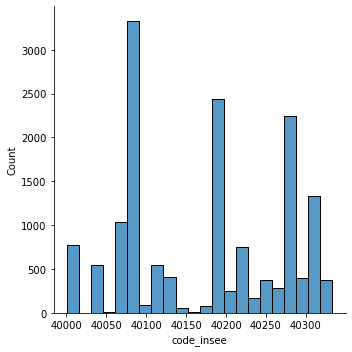

In [166]:
import matplotlib.pyplot as plt

for column in ['Code Profession', "Famille de l'acte réalisé", 'Montant généralement constaté', 'Borne inférieure montant', 'Borne supérieure montant', 'Montant : Anesthésie', 'Borne Inf : Anesthésie', 'Borne Sup : Anesthésie', 'code_insee']:
    sns.displot(df, x=column)
    print(column)
    plt.show()

### Step 1.8 : Check the correlation between variables in the data

<AxesSubplot:>

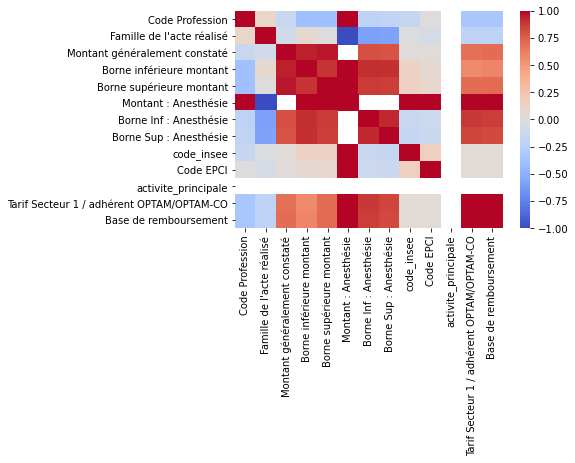

In [167]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, cmap= 'coolwarm')

In [168]:
# If there are too many columns, you can try the methods below
correlation_mat = df.corr()

corr_pairs = correlation_mat.unstack()
print(corr_pairs)

sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

negative_pairs = sorted_pairs[sorted_pairs < 0]
print(negative_pairs)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

Code Profession        Code Profession                              1.000000
                       Famille de l'acte réalisé                    0.102761
                       Montant généralement constaté               -0.148567
                       Borne inférieure montant                    -0.383496
                       Borne supérieure montant                    -0.388195
                                                                      ...   
Base de remboursement  code_insee                                   0.044835
                       Code EPCI                                    0.043555
                       activite_principale                               NaN
                       Tarif Secteur 1 / adhérent OPTAM/OPTAM-CO    0.997100
                       Base de remboursement                        1.000000
Length: 169, dtype: float64
Montant : Anesthésie                       Famille de l'acte réalisé                   -1.000000
Famille de l'acte réalisé   

## Step 2 : Data cleaning

### Step 2.1 : Remove irrelevant observations

### Step 2.2 : Remove unwanted outliers

In [169]:
df.columns

Index(['Civilité', 'Numéro de téléphone', 'Code Profession',
       'Mode d'exercice particulier', 'Nature d'exercice', 'Convention et CAS',
       'Contrat d'accès aux soins', 'Sesam Vitale',
       'Code CCAM de l'acte réalisé', 'Famille de l'acte réalisé',
       'Montant généralement constaté', 'Borne inférieure montant',
       'Borne supérieure montant', 'Montant : Anesthésie',
       'Borne Inf : Anesthésie', 'Borne Sup : Anesthésie',
       'Nom du professionnel', 'Adresse', 'Profession', 'Type d'acte réalisé',
       'Famille de l'acte technique réalisé', 'Coordonnées', 'Commune',
       'code_insee', 'EPCI', 'Code EPCI', 'activite_principale',
       'Regroupement', 'Acte technique réalisé',
       'Tarif hors secteur 1 / hors adhérent OPTAM/OPTAM-CO',
       'Tarif Secteur 1 / adhérent OPTAM/OPTAM-CO', 'Base de remboursement',
       'Libellé acte clinique'],
      dtype='object')

In [170]:
df.boxplot(column=["Base de remboursement"])

<AxesSubplot:>

In [171]:
df["Base de remboursement"].describe()

count    13505.000000
mean        75.548213
std         78.799921
min          7.980000
25%         28.920000
50%         50.540000
75%         90.000000
max       1047.900000
Name: Base de remboursement, dtype: float64

In [172]:
df[df["Base de remboursement"]>1000]

Civilité Numéro de téléphone  Code Profession  \
14850    Femme                 NaN             12.0   
16307    Homme                 NaN              3.0   

      Mode d'exercice particulier                Nature d'exercice  \
14850                         NaN  Libéral temps plein hospitalier   
16307                         NaN                 Libéral intégral   

               Convention et CAS Contrat d'accès aux soins  \
14850  Secteur 1 ou conventionné                         O   
16307  Secteur 1 ou conventionné                         N   

                               Sesam Vitale Code CCAM de l'acte réalisé  \
14850  Pas de lecteur de carte Sesam Vitale                    LHFA0010   
16307         Lecteur de carte Sesam Vitale                    NEKA0060   

       Famille de l'acte réalisé  ...  code_insee             EPCI  Code EPCI  \
14850                       51.0  ...       40088  CA du Grand Dax  244000675   
16307                       37.0  ...       40088  CA du Grand Dax  244000675   

       activite_principale        Regroupement  \
14850                    1  Actes de chirurgie   
16307                    1  Actes de chirurgie   

                                  Acte technique réalisé  \
14850  Arthrectomie totale bilatérale et/ou ostéotomi...   
16307  Changement des pièces acétabulaire et fémorale...   

      Tarif hors secteur 1 / hors adhérent OPTAM/OPTAM-CO  \
14850                                             849.18    
16307                                             860.82    

      Tarif Secteur 1 / adhérent OPTAM/OPTAM-CO Base de remboursement  \
14850                                   1047.90               1047.90   
16307                                   1001.11               1001.11   

      Libellé acte clinique  
14850                   NaN  
16307                   NaN  

[2 rows x 33 columns]

In [173]:
df.drop( df[df["Base de remboursement"]>1000].index, inplace=True) # Elimination des outliers

In [174]:
df[df["Base de remboursement"]>1000]

Empty DataFrame
Columns: [Civilité, Numéro de téléphone, Code Profession, Mode d'exercice particulier, Nature d'exercice, Convention et CAS, Contrat d'accès aux soins, Sesam Vitale, Code CCAM de l'acte réalisé, Famille de l'acte réalisé, Montant généralement constaté, Borne inférieure montant, Borne supérieure montant, Montant : Anesthésie, Borne Inf : Anesthésie, Borne Sup : Anesthésie, Nom du professionnel, Adresse, Profession, Type d'acte réalisé, Famille de l'acte technique réalisé, Coordonnées, Commune, code_insee, EPCI, Code EPCI, activite_principale, Regroupement, Acte technique réalisé, Tarif hors secteur 1 / hors adhérent OPTAM/OPTAM-CO, Tarif Secteur 1 / adhérent OPTAM/OPTAM-CO, Base de remboursement, Libellé acte clinique]
Index: []

[0 rows x 33 columns]

### Step 2.3 : Handle missing data (drop observations, input missing values based on other observations)

### Step 2.4 : Remove remaining columns with a high percentage of missing values

In [175]:
print(df.shape)
# To remove columns with more than 90% of null : thresh=int( df.shape[0] * 0.90)
# df.dropna(axis=1, thresh=int( df.shape[0] * 0.95) , inplace=True)

print(df.shape)

(15503, 33)
(15503, 33)


In [176]:
print(df.isnull().sum().sort_values() / df.shape[0] * 100)

Civilité                                                0.000000
activite_principale                                     0.000000
Code EPCI                                               0.000000
EPCI                                                    0.000000
code_insee                                              0.000000
Commune                                                 0.000000
Coordonnées                                             0.000000
Type d'acte réalisé                                     0.000000
Adresse                                                 0.000000
Nom du professionnel                                    0.000000
Code CCAM de l'acte réalisé                             0.000000
Sesam Vitale                                            0.000000
Convention et CAS                                       0.000000
Nature d'exercice                                       0.000000
Profession                                              0.496678
Code Profession          

### Step 2.5 : Fix structural errors *(strange naming conventions, typos, incorrect capitalization, mislabeled categories. Ex: “N/A” and “Not Applicable”  should be analyzed as the same category.)*

### Step 2.6 : Deal with duplicate values

In [177]:
df.columns

Index(['Civilité', 'Numéro de téléphone', 'Code Profession',
       'Mode d'exercice particulier', 'Nature d'exercice', 'Convention et CAS',
       'Contrat d'accès aux soins', 'Sesam Vitale',
       'Code CCAM de l'acte réalisé', 'Famille de l'acte réalisé',
       'Montant généralement constaté', 'Borne inférieure montant',
       'Borne supérieure montant', 'Montant : Anesthésie',
       'Borne Inf : Anesthésie', 'Borne Sup : Anesthésie',
       'Nom du professionnel', 'Adresse', 'Profession', 'Type d'acte réalisé',
       'Famille de l'acte technique réalisé', 'Coordonnées', 'Commune',
       'code_insee', 'EPCI', 'Code EPCI', 'activite_principale',
       'Regroupement', 'Acte technique réalisé',
       'Tarif hors secteur 1 / hors adhérent OPTAM/OPTAM-CO',
       'Tarif Secteur 1 / adhérent OPTAM/OPTAM-CO', 'Base de remboursement',
       'Libellé acte clinique'],
      dtype='object')

In [178]:
key = ['Civilité', 'Numéro de téléphone', 'Code Profession', 'Adresse', 'Nom du professionnel'] #Définition de la clé

In [179]:
df_duplicated = df[key].value_counts() # Enregistrer les occurences des tuples de la clé dans df_duplicated
print("Duplicate values :")
df_duplicated[df_duplicated>1] # Puis afficher les instances qui sont dupliquées

Duplicate values :


Civilité  Numéro de téléphone  Code Profession  Adresse                                                                               Nom du professionnel
Homme     05.58.75.04.82       67.0             1 ALLEE CLAUDE MORA  40000 MONT DE MARSAN                                             PHILIPPE CAMPISTRON     110
          05.58.71.61.23       67.0             BP 69 16 RUE CHANTEMERLE  40801 AIRE SUR L ADOUR CEDEX                                JEAN MICHEL TOULET      103
          05.58.06.01.02       67.0             SELARL DRS BARTHABURU ET FATAS  260 BOULEVARD DE LA REPUBLIQUE  40000 MONT DE MARSAN  JEAN CLAUDE FATAS        87
Femme     05.58.71.61.23       67.0             BP69 16 RUE CHANTEMERLE  40801 AIRE SUR L ADOUR CEDEX                                 SYLVIE DUIN              78
Homme     05.58.77.79.70       67.0             SELARL CIL  CHEMIN MATTECU  40230 ST VINCENT DE TYROSSE                               JEAN MARIE GELEZ         73
                                   

In [180]:
len(df["Nom du professionnel"].unique()) - len(df[df["Libellé acte clinique"].isna()]["Nom du professionnel"].unique())

301

On a 301 médecins qui n'ont pas de valeur manquante pour la colonne "Libellé acte clinique", on pourra donc mettre cette colonne dans la clés.

In [181]:
key.append("Libellé acte clinique")

In [182]:
df_duplicated = df[key].value_counts() # Enregistrer les occurences des tuples de la clé dans df_duplicated
print("Duplicate values :")
df_duplicated[df_duplicated>1] # Puis afficher les instances qui sont dupliquées

Duplicate values :


Series([], dtype: int64)

On a donc finalement plus de doublons dans notre dataframe

### Step 2.7 : Split values into many columns

In [183]:
df.columns

Index(['Civilité', 'Numéro de téléphone', 'Code Profession',
       'Mode d'exercice particulier', 'Nature d'exercice', 'Convention et CAS',
       'Contrat d'accès aux soins', 'Sesam Vitale',
       'Code CCAM de l'acte réalisé', 'Famille de l'acte réalisé',
       'Montant généralement constaté', 'Borne inférieure montant',
       'Borne supérieure montant', 'Montant : Anesthésie',
       'Borne Inf : Anesthésie', 'Borne Sup : Anesthésie',
       'Nom du professionnel', 'Adresse', 'Profession', 'Type d'acte réalisé',
       'Famille de l'acte technique réalisé', 'Coordonnées', 'Commune',
       'code_insee', 'EPCI', 'Code EPCI', 'activite_principale',
       'Regroupement', 'Acte technique réalisé',
       'Tarif hors secteur 1 / hors adhérent OPTAM/OPTAM-CO',
       'Tarif Secteur 1 / adhérent OPTAM/OPTAM-CO', 'Base de remboursement',
       'Libellé acte clinique'],
      dtype='object')

Diviser la colonne Adresse en plusieurs colonnes : "Complément", "Numéro_rue", "Nom_rue", "Code_postal", "Commune"

In [184]:
df["Adresse"]

3                     143 RUE SAINTE HELENE  40260 CASTETS
4            84 AVENUE DE LA REPUBLIQUE  40600 BISCARROSSE
5            84 AVENUE DE LA REPUBLIQUE  40600 BISCARROSSE
6            84 AVENUE DE LA REPUBLIQUE  40600 BISCARROSSE
7        MEDIPOLE DE L'AERODROME 25 AVENUE NUNGESSER ET...
                               ...                        
16491    SELAS OCEAN IMAGERIE  20 ALLEE DU PETIT PIERRE...
16492      14 RUE DE L'AEROPOSTALE  40160 PARENTIS EN BORN
16493    36 AVENUE DE LE COTE D'ARGENT  40230 ST VINCEN...
16494    36 AVENUE DE LE COTE D'ARGENT  40230 ST VINCEN...
16495    5 RUE DOMINIQUE DE GOURGUES  40000 MONT DE MARSAN
Name: Adresse, Length: 15503, dtype: object

In [185]:
import re

def split_it(adresse):  # Fonction permettant de diviser l'adresse en plusieurs parties
    return re.findall("([A-Z\s']+)?(\d+) ([A-Z\s']+)(\d{5})\s([^0-9]+)", adresse)

In [186]:
df["Adresse_list"] = df['Adresse'].apply(lambda x: split_it(x))

In [187]:
index_delete = []
for i in df.Adresse_list.index: 
    if len(df["Adresse_list"][i])==0:
        index_delete.append(i)
        
index_delete # Les index des adresses invalides

[11,
 35,
 36,
 37,
 77,
 78,
 79,
 82,
 89,
 90,
 92,
 104,
 117,
 118,
 150,
 164,
 165,
 166,
 173,
 178,
 180,
 181,
 190,
 193,
 194,
 204,
 205,
 206,
 207,
 212,
 214,
 216,
 222,
 226,
 244,
 245,
 246,
 252,
 267,
 279,
 282,
 284,
 309,
 312,
 313,
 327,
 330,
 360,
 366,
 367,
 369,
 370,
 371,
 383,
 397,
 413,
 420,
 440,
 446,
 448,
 449,
 473,
 525,
 538,
 548,
 551,
 564,
 586,
 591,
 602,
 603,
 604,
 605,
 620,
 621,
 622,
 643,
 648,
 657,
 659,
 661,
 662,
 674,
 689,
 693,
 741,
 744,
 745,
 746,
 757,
 763,
 764,
 765,
 771,
 788,
 825,
 834,
 841,
 846,
 852,
 863,
 866,
 876,
 877,
 892,
 893,
 903,
 904,
 913,
 914,
 926,
 929,
 931,
 932,
 933,
 938,
 941,
 942,
 954,
 956,
 968,
 969,
 997,
 998,
 1003,
 1004,
 1005,
 1006,
 1013,
 1016,
 1017,
 1018,
 1029,
 1030,
 1031,
 1032,
 1037,
 1060,
 1061,
 1062,
 1105,
 1108,
 1110,
 1111,
 1117,
 1127,
 1138,
 1139,
 1140,
 1141,
 1174,
 1175,
 1176,
 1182,
 1183,
 1189,
 1204,
 1214,
 1256,
 1257,
 1263,
 1278,
 

In [188]:
df = df.drop(index_delete) 

In [189]:
liste = []
for i in df.index:
    liste.append(df.loc[i, "Adresse_list"])

In [190]:
liste

[[('', '143', 'RUE SAINTE HELENE  ', '40260', 'CASTETS')],
 [('', '84', 'AVENUE DE LA REPUBLIQUE  ', '40600', 'BISCARROSSE')],
 [('', '84', 'AVENUE DE LA REPUBLIQUE  ', '40600', 'BISCARROSSE')],
 [('', '84', 'AVENUE DE LA REPUBLIQUE  ', '40600', 'BISCARROSSE')],
 [("MEDIPOLE DE L'AERODROME ",
   '25',
   'AVENUE NUNGESSER ET COLI  ',
   '40100',
   'DAX')],
 [("MEDIPOLE DE L'AERODROME ",
   '25',
   'AVENUE NUNGESSER ET COLI  ',
   '40100',
   'DAX')],
 [("MEDIPOLE DE L'AERODROME ",
   '25',
   'AVENUE NUNGESSER ET COLI  ',
   '40100',
   'DAX')],
 [("MEDIPOLE DE L'AERODROME ",
   '25',
   'AVENUE NUNGESSER ET COLI  ',
   '40100',
   'DAX')],
 [('', '309', 'AVENUE GENERAL DE GAULLE  ', '40300', 'PEYREHORADE')],
 [('', '36', 'RUE ISIDORE SALLES  ', '40110', 'MORCENX')],
 [('', '114', 'RUE DE LA CROIX BLANCHE  ', '40100', 'DAX')],
 [('', '114', 'RUE DE LA CROIX BLANCHE  ', '40100', 'DAX')],
 [('ZAC DE PEYRES ',
   '42',
   'RUE DE VIELLE TURSAN  ',
   '40800',
   'AIRE SUR L ADOUR')],
 [

In [191]:
comp = []
numr = []
nomr = []
cp = []
comm = []

for i in range(len(liste)):
    comp.append(liste[i][0][0])
    numr.append(liste[i][0][1])
    nomr.append(liste[i][0][2])
    cp.append(liste[i][0][3])
    comm.append(liste[i][0][4])

In [192]:
df = df.assign(Complement = comp, Numero_rue = numr, Nom_rue = nomr, Code_postal = cp, Commune = comm)
df = df.drop(['Adresse_list'], axis=1)

df.columns

Index(['Civilité', 'Numéro de téléphone', 'Code Profession',
       'Mode d'exercice particulier', 'Nature d'exercice', 'Convention et CAS',
       'Contrat d'accès aux soins', 'Sesam Vitale',
       'Code CCAM de l'acte réalisé', 'Famille de l'acte réalisé',
       'Montant généralement constaté', 'Borne inférieure montant',
       'Borne supérieure montant', 'Montant : Anesthésie',
       'Borne Inf : Anesthésie', 'Borne Sup : Anesthésie',
       'Nom du professionnel', 'Adresse', 'Profession', 'Type d'acte réalisé',
       'Famille de l'acte technique réalisé', 'Coordonnées', 'Commune',
       'code_insee', 'EPCI', 'Code EPCI', 'activite_principale',
       'Regroupement', 'Acte technique réalisé',
       'Tarif hors secteur 1 / hors adhérent OPTAM/OPTAM-CO',
       'Tarif Secteur 1 / adhérent OPTAM/OPTAM-CO', 'Base de remboursement',
       'Libellé acte clinique', 'Complement', 'Numero_rue', 'Nom_rue',
       'Code_postal'],
      dtype='object')

In [193]:
df[["Complement", "Numero_rue", "Nom_rue", "Code_postal", "Commune"]]

Complement Numero_rue                       Nom_rue  \
3                                      143           RUE SAINTE HELENE     
4                                       84     AVENUE DE LA REPUBLIQUE     
5                                       84     AVENUE DE LA REPUBLIQUE     
6                                       84     AVENUE DE LA REPUBLIQUE     
7      MEDIPOLE DE L'AERODROME          25    AVENUE NUNGESSER ET COLI     
...                         ...        ...                           ...   
16491    SELAS OCEAN IMAGERIE           20       ALLEE DU PETIT PIERRE     
16492                                   14        RUE DE L'AEROPOSTALE     
16493                                   36  AVENUE DE LE COTE D'ARGENT     
16494                                   36  AVENUE DE LE COTE D'ARGENT     
16495                                    5   RUE DOMINIQUE DE GOURGUES     

      Code_postal                Commune  
3           40260                CASTETS  
4           40600            BISCARROSSE  
5           40600            BISCARROSSE  
6           40600            BISCARROSSE  
7           40100                    DAX  
...           ...                    ...  
16491       40390  ST MARTIN DE SEIGNANX  
16492       40160       PARENTIS EN BORN  
16493       40230  ST VINCENT DE TYROSSE  
16494       40230  ST VINCENT DE TYROSSE  
16495       40000         MONT DE MARSAN  

[13289 rows x 5 columns]

### Step 2.8 : Change the data type of columns 

- On change le type de la colonne "Numéro de voie" de Float64 à Int64

In [194]:
df["Code Profession"] = df["Code Profession"].astype("Int64")
df["Code Profession"]

3        18
4        18
5        18
6        18
7        67
         ..
16491    67
16492    71
16493    18
16494    18
16495    18
Name: Code Profession, Length: 13289, dtype: Int64

## Step 3 : Export dataframe to csv

In [195]:
from pathlib import Path

filepath = Path('medecins_clean.csv')
df.to_csv(filepath, index=False)